In [25]:
from _utils import *

In [26]:
import pyBigWig

# Open the BigWig file
ctcf_bw_esc = pyBigWig.open('/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/chip_seq_paper/GSM4773203_H9_ESC_CTCF_ChIPseq_replicate2.scale.bw')
ctcf_bw_cncc = pyBigWig.open('/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/chip_seq_paper/GSM4773208_H9_P4CNCC_CTCF_ChIPseq_replicate2.scale.bw')

data_list = [ctcf_bw_esc, ctcf_bw_cncc]

In [27]:
chrom = 'chr17'
start = 68066461
end = 72018460
num_monomers = 800

summary_list = []
for data in data_list:
    summary = data.stats(chrom, start, end, type="mean", nBins=num_monomers)
    summary_list.append(summary)
    
summary_list = np.array(summary_list)

In [28]:
def logistic_transformation(x, steep=1, mu=0):
    return 1 / (1 + np.exp(-steep*(x - mu)))

Text(0.5, 1.0, 'CNCC')

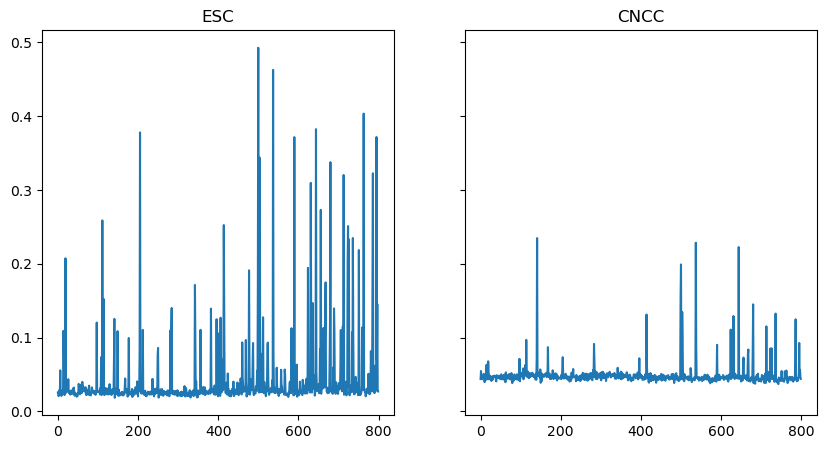

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax[0].plot(summary_list[0])
ax[0].set_title('ESC')
ax[1].plot(summary_list[1])
ax[1].set_title('CNCC')

In [30]:
ctcf_str_esc = logistic_transformation(summary_list[0], steep=1e2, mu=0.04)
ctcf_str_cncc = logistic_transformation(summary_list[1], steep=1e2, mu=0.04)

Text(0.5, 1.0, 'CNCC')

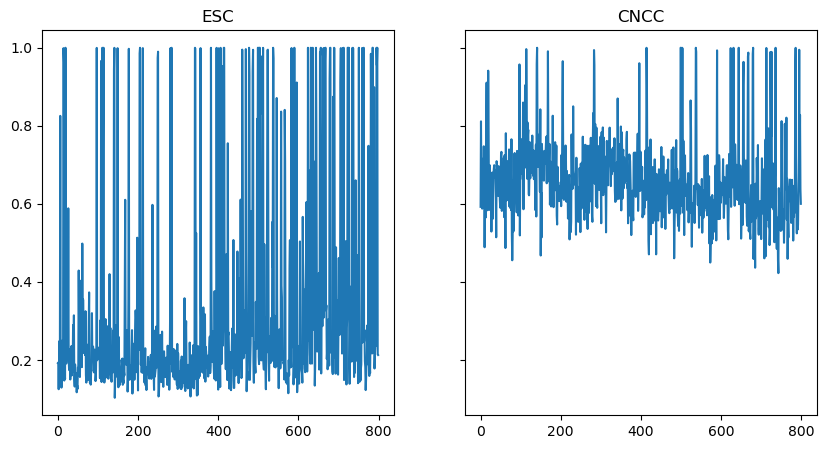

In [31]:
c

In [32]:
# Read ctcf directionality from tsv file
ctcf_dir = pd.read_csv('/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/ctcf_directionality/fimo.tsv', sep='\t')


In [33]:
ctcf_dir.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,MA0139.1,CTCF,chr2,232477432.0,232477450.0,+,29.1148,5.980000e-13,0.000959,TGGCCACCAGGGGGCGCCG
1,MA0139.1,CTCF,chr4,5823512.0,5823530.0,+,29.0492,8.420000e-13,0.000959,CGGCCACCAGGGGGCGCCA
2,MA0139.1,CTCF,chr16,85004316.0,85004334.0,-,29.0492,8.420000e-13,0.000959,CGGCCACCAGGGGGCGCCA
3,MA0139.1,CTCF,chr3,97742256.0,97742274.0,-,29.0492,8.420000e-13,0.000959,CGGCCACCAGGGGGCGCCA
4,MA0139.1,CTCF,chr5,136835086.0,136835104.0,-,29.0492,8.420000e-13,0.000959,CGGCCACCAGGGGGCGCCA


In [34]:
# Get the CTCF directionality for the region
ctcf_dir_region = ctcf_dir[
    (ctcf_dir['sequence_name'] == chrom) &
    (ctcf_dir['start'] >= start) &
    (ctcf_dir['stop'] <= end)
]

In [35]:
ctcf_dir_region.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
8,MA0139.1,CTCF,chr17,71366198.0,71366216.0,-,28.5246,3.420000e-12,0.00153,TGGCCAGCAGGGGGCGCCA
308,MA0139.1,CTCF,chr17,71425692.0,71425710.0,+,26.1803,3.070000e-10,0.00564,TGGCCACCAGATGGCGCCC
402,MA0139.1,CTCF,chr17,71251992.0,71252010.0,+,25.8197,5.090000e-10,0.00708,TGGCCAGCAGGTGGCAGCA
3929,MA0139.1,CTCF,chr17,69080554.0,69080572.0,-,22.1967,2.060000e-08,0.02970,CAACCACCAGGGGGCAGGG
4691,MA0139.1,CTCF,chr17,71952911.0,71952929.0,-,21.8197,2.820000e-08,0.03410,AGGCCTGCAGGGGGCACTG


In [36]:
# Bin the CTCF directionality into 80 bins
bins = num_monomers 
ctcf_dir_region_bin = pd.cut(ctcf_dir_region['start'], bins, labels=False)

In [37]:
ctcf_dir_region.loc[:, 'bin'] = ctcf_dir_region_bin

/tmp/ipykernel_596717/2174628655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctcf_dir_region.loc[:, 'bin'] = ctcf_dir_region_bin


In [38]:
ctcf_dir_region.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,bin
8,MA0139.1,CTCF,chr17,71366198.0,71366216.0,-,28.5246,3.420000e-12,0.00153,TGGCCAGCAGGGGGCGCCA,667
308,MA0139.1,CTCF,chr17,71425692.0,71425710.0,+,26.1803,3.070000e-10,0.00564,TGGCCACCAGATGGCGCCC,679
402,MA0139.1,CTCF,chr17,71251992.0,71252010.0,+,25.8197,5.090000e-10,0.00708,TGGCCAGCAGGTGGCAGCA,644
3929,MA0139.1,CTCF,chr17,69080554.0,69080572.0,-,22.1967,2.060000e-08,0.02970,CAACCACCAGGGGGCAGGG,196
4691,MA0139.1,CTCF,chr17,71952911.0,71952929.0,-,21.8197,2.820000e-08,0.03410,AGGCCTGCAGGGGGCACTG,788


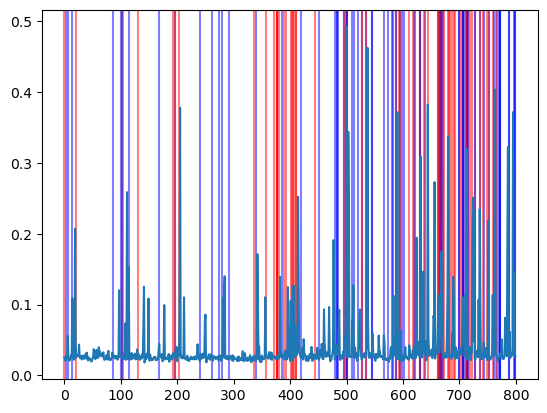

In [39]:
for dir, bin in ctcf_dir_region[['strand', 'bin']].values:
    if dir == '+':
        plt.axvline(bin, color='red', alpha=0.5)
    else:
        plt.axvline(bin, color='blue', alpha=0.5)
plt.plot(summary_list[0])

In [40]:
ctcf_dir_region = ctcf_dir_region.sort_values('bin')

In [41]:
# remove duplicates in the bin column
ctcf_dir_region = ctcf_dir_region.drop_duplicates('bin')

In [42]:
ctcf_dir_region

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,bin
51497,MA0139.1,CTCF,chr17,68128425.0,68128443.0,+,15.7213,1.760000e-06,0.1940,TGGACACCAAGTGGCGCCA,0
5679,MA0139.1,CTCF,chr17,68140559.0,68140577.0,-,21.4098,3.910000e-08,0.0391,TGACCACAAGGTGGCACAA,2
70809,MA0139.1,CTCF,chr17,68164350.0,68164368.0,-,14.9180,2.760000e-06,0.2210,TGGCCCCTAGGAGGTGCTG,7
83141,MA0139.1,CTCF,chr17,68195395.0,68195413.0,-,14.5082,3.450000e-06,0.2360,TGGACACTGGGGGTCACTA,13
83143,MA0139.1,CTCF,chr17,68230331.0,68230349.0,+,14.5082,3.450000e-06,0.2360,tagccaaaaggtggaagca,21
...,...,...,...,...,...,...,...,...,...,...,...
36045,MA0139.1,CTCF,chr17,71876566.0,71876584.0,-,16.6393,1.030000e-06,0.1620,GAGCCTCCAGAGGGAACCA,772
12216,MA0139.1,CTCF,chr17,71949050.0,71949068.0,-,19.4426,1.690000e-07,0.0787,GAGCCGGCAGGGGGCGCGG,787
4691,MA0139.1,CTCF,chr17,71952911.0,71952929.0,-,21.8197,2.820000e-08,0.0341,AGGCCTGCAGGGGGCACTG,788
45856,MA0139.1,CTCF,chr17,71994933.0,71994951.0,-,16.0328,1.470000e-06,0.1820,CTTCCACAAGGGGGCAGGT,797


In [43]:
# Extract the bin and ctcf directionality 
ctcf_dir_region_bin = ctcf_dir_region[['bin', 'strand']]

In [44]:
ctcf_str_esc_bin = []
ctcf_str_cnc_bin = []
for i in ctcf_dir_region_bin['bin'].values:
    ctcf_str_esc_bin.append(ctcf_str_esc[i])
    ctcf_str_cnc_bin.append(ctcf_str_cncc[i])

In [45]:
ctcf_dir_region_bin['ctcf_str_esc'] = ctcf_str_esc_bin
ctcf_dir_region_bin['ctcf_str_cnc'] = ctcf_str_cnc_bin

/tmp/ipykernel_596717/3798403354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctcf_dir_region_bin['ctcf_str_esc'] = ctcf_str_esc_bin
/tmp/ipykernel_596717/3798403354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctcf_dir_region_bin['ctcf_str_cnc'] = ctcf_str_cnc_bin


In [46]:
ctcf_dir_region_bin.to_csv('/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/ctcf_summary/20241023_ctcf_str_bin800.csv', index=False)